In [12]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC


# # Load dataset
# df = pd.read_csv("../data/heart_disease_selected.csv")

# # Split features & target
# X = df.drop("target", axis=1)
# y = df["target"]

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# # -----------------------------
# # 1. Define models & parameters
# # -----------------------------
# param_grid = {
#     "Logistic Regression": {
#         "model": LogisticRegression(max_iter=1000),
#         "params": {
#             "C": [0.01, 0.1, 1, 10],
#             "solver": ["liblinear", "lbfgs"]
#         }
#     },
#     "Decision Tree": {
#         "model": DecisionTreeClassifier(),
#         "params": {
#             "max_depth": [3, 5, 7, None],
#             "min_samples_split": [2, 5, 10]
#         }
#     },
#     "Random Forest": {
#         "model": RandomForestClassifier(),
#         "params": {
#             "n_estimators": [50, 100, 200],
#             "max_depth": [None, 5, 10],
#             "min_samples_split": [2, 5, 10]
#         }
#     },
#     "SVM": {
#         "model": SVC(probability=True),
#         "params": {
#             "C": [0.1, 1, 10],
#             "kernel": ["linear", "rbf"]
#         }
#     }
# }

# # -----------------------------
# # 2. Run GridSearchCV
# # -----------------------------
# best_models = {}
# results = []

# for name, mp in param_grid.items():
#     print(f"🔍 Tuning {name}...")
#     grid = GridSearchCV(mp["model"], mp["params"], cv=5, scoring="accuracy", n_jobs=-1)
#     grid.fit(X_train, y_train)

#     best_model = grid.best_estimator_
#     best_models[name] = best_model

#     # Evaluate on test set
#     y_pred = best_model.predict(X_test)
#     y_prob = best_model.predict_proba(X_test)[:,1] if hasattr(best_model, "predict_proba") else None

#     results.append({
#         "Model": name,
#         "Best Params": grid.best_params_,
#         "Accuracy": accuracy_score(y_test, y_pred),
#         "Precision": precision_score(y_test, y_pred),
#         "Recall": recall_score(y_test, y_pred),
#         "F1-score": f1_score(y_test, y_pred),
#         "AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None
#     })

# # -----------------------------
# # 3. Create Results DataFrame
# # -----------------------------
# results_df = pd.DataFrame(results)
# print("\n📊 Hyperparameter Tuning Results:")
# print(results_df[["Model", "Accuracy", "Precision", "Recall", "F1-score", "AUC"]])

# # -----------------------------
# # 4. Plot Metrics
# # -----------------------------
# plt.figure(figsize=(8,5))
# sns.barplot(data=results_df, x="Model", y="Accuracy", palette="Blues_d")
# plt.title("Model Accuracy after Hyperparameter Tuning")
# plt.ylabel("Accuracy")
# plt.show()

# # -----------------------------
# # 5. Plot ROC Curves
# # -----------------------------
# plt.figure(figsize=(8,6))
# for name, model in best_models.items():
#     if hasattr(model, "predict_proba"):
#         y_prob = model.predict_proba(X_test)[:,1]
#         fpr, tpr, _ = roc_curve(y_test, y_prob)
#         plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_prob):.2f})")

# plt.plot([0,1], [0,1], "k--")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curves for Tuned Models")
# plt.legend()
# plt.show()


In [13]:
# import joblib

# # Save the best model (example: Random Forest)
# best_model = best_models["Random Forest"]   # or whichever performed best
# joblib.dump(best_model, "../models/final_model.pkl")

# print("✅ Model saved to models/final_model.pkl")


🔍 Tuning Logistic Regression...
🔍 Tuning Decision Tree...
🔍 Tuning Random Forest...
🔍 Tuning SVM...

📊 Hyperparameter Tuning Results:

                 Model  Accuracy  Precision    Recall  F1-score       AUC
2        Random Forest  0.819672   0.805556  0.878788  0.840580  0.860390
3                  SVM  0.786885   0.794118  0.818182  0.805970  0.853896
0  Logistic Regression  0.770492   0.787879  0.787879  0.787879  0.873377
1        Decision Tree  0.754098   0.725000  0.878788  0.794521  0.807359


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13100\3303835996.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="Accuracy", palette="Blues_d")


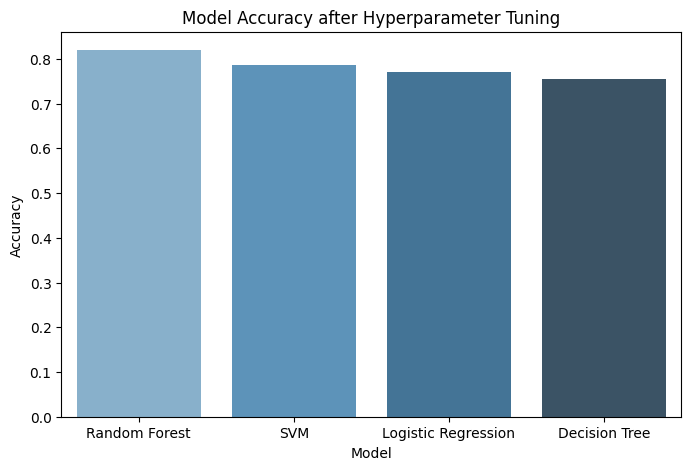

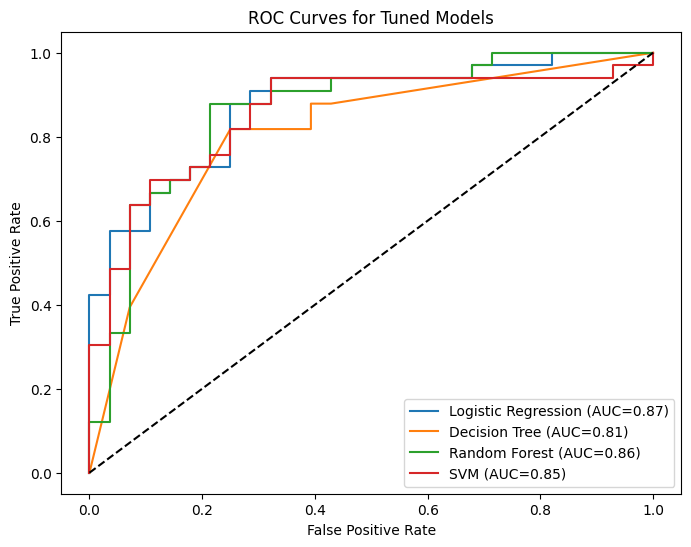

✅ Best model saved: Random Forest_final.pkl


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib

# --------------------------
# Load dataset
# --------------------------
df = pd.read_csv("../data/heart_disease_selected.csv")
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --------------------------
# Parameter Grids
# --------------------------
param_grid = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "solver": ["liblinear", "lbfgs"]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "max_depth": [3, 5, 7, None],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 5, 10],
            "min_samples_split": [2, 5, 10]
        }
    },
    "SVM": {
        "model": SVC(probability=True),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"]
        }
    }
}

# --------------------------
# GridSearchCV
# --------------------------
best_models = {}
results = []

for name, mp in param_grid.items():
    print(f"🔍 Tuning {name}...")
    grid = GridSearchCV(mp["model"], mp["params"], cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    best_models[name] = best_model

    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:,1] if hasattr(best_model, "predict_proba") else None

    results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None
    })

results_df = pd.DataFrame(results).sort_values("Accuracy", ascending=False)
print("\n📊 Hyperparameter Tuning Results:\n")
print(results_df[["Model", "Accuracy", "Precision", "Recall", "F1-score", "AUC"]])

# --------------------------
# Visualization
# --------------------------
plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x="Model", y="Accuracy", palette="Blues_d")
plt.title("Model Accuracy after Hyperparameter Tuning")
plt.ylabel("Accuracy")
plt.show()

plt.figure(figsize=(8,6))
for name, model in best_models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_prob):.2f})")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Tuned Models")
plt.legend()
plt.show()

# --------------------------
# Save Best Model Automatically
# --------------------------
best_model_name = results_df.iloc[0]["Model"]
best_model = best_models[best_model_name]
joblib.dump(best_model, f"../models/{best_model_name}_final.pkl")
print(f"✅ Best model saved: {best_model_name}_final.pkl")
